# Muhamad Rizky Nilzamyahya 2009106029

In [30]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

## Load dataset fashion_mnist

In [31]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.fashion_mnist.load_data()

## Encoding menggunakan one-hot encoding

In [32]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Menampilkan gambar dari fashion_mnist

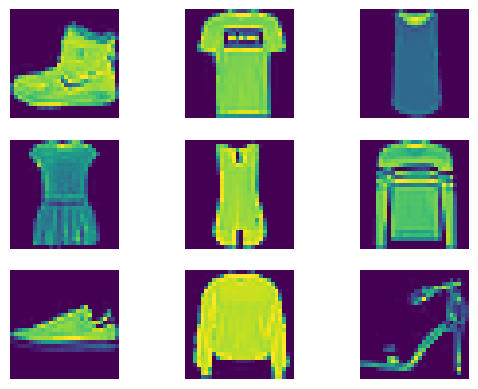

In [33]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

## Konversikan gambar 28x28 menjadi 784x1 vector

In [34]:
#konversi gambar
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

#Normalisasi pixel gambar
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Membuat Sequential Model

In [35]:
model = keras.Sequential([
layers.Dense(512, activation='relu', input_dim = 784),
layers.Dense(256, activation='relu'),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [36]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Optimizer,
metrics=['accuracy'])

## Training Model

In [37]:
# Batch size = 128, epochs = 10
model.fit(x_train, y_train,
batch_size=128,validation_data=(x_test,y_test),
epochs=10,
verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4903 - accuracy: 0.8237 - val_loss: 0.4011 - val_accuracy: 0.8558
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3569 - accuracy: 0.8692 - val_loss: 0.3776 - val_accuracy: 0.8682
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3143 - accuracy: 0.8826 - val_loss: 0.3590 - val_accuracy: 0.8685
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2916 - accuracy: 0.8917 - val_loss: 0.3533 - val_accuracy: 0.8722
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2802 - accuracy: 0.8935 - val_loss: 0.3406 - val_accuracy: 0.8812
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2627 - accuracy: 0.9017 - val_loss: 0.3373 - val_accuracy: 0.8794
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2514 - accuracy: 0.9046 - val_loss: 0.3283 - val_accuracy: 0.8824
Epoch 

## Test Accuracy

In [38]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', round(score[1] * 100,2),'%')

313/313 [==============================] - 1s 2ms/step - loss: 0.3131 - accuracy: 0.8888
Test loss: 0.3130754828453064
Test accuracy: 88.88 %


## Training Accuracy

In [39]:
score = model.evaluate(x_train, y_train, verbose=1)
print('Training loss:', score[0])
print('Training accuracy:', round(score[1] * 100,2),'%')

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1943 - accuracy: 0.9255
Training loss: 0.19428937137126923
Training accuracy: 92.55 %


## Prediksi Data Testing

313/313 [==============================] - 1s 2ms/step


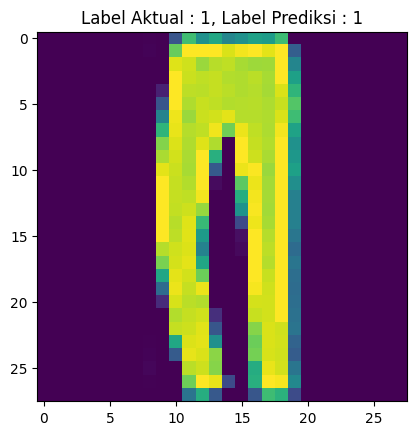

In [40]:
prediksi = model.predict(x_test)

label = np.argmax(prediksi,axis=1)
ActualLabel = np.argmax(y_test[2])



img = x_test[2].reshape(28, 28)

plt.title(f"Label Aktual : {ActualLabel}, Label Prediksi : {label[2]}")

plt.imshow(img)
plt.show()

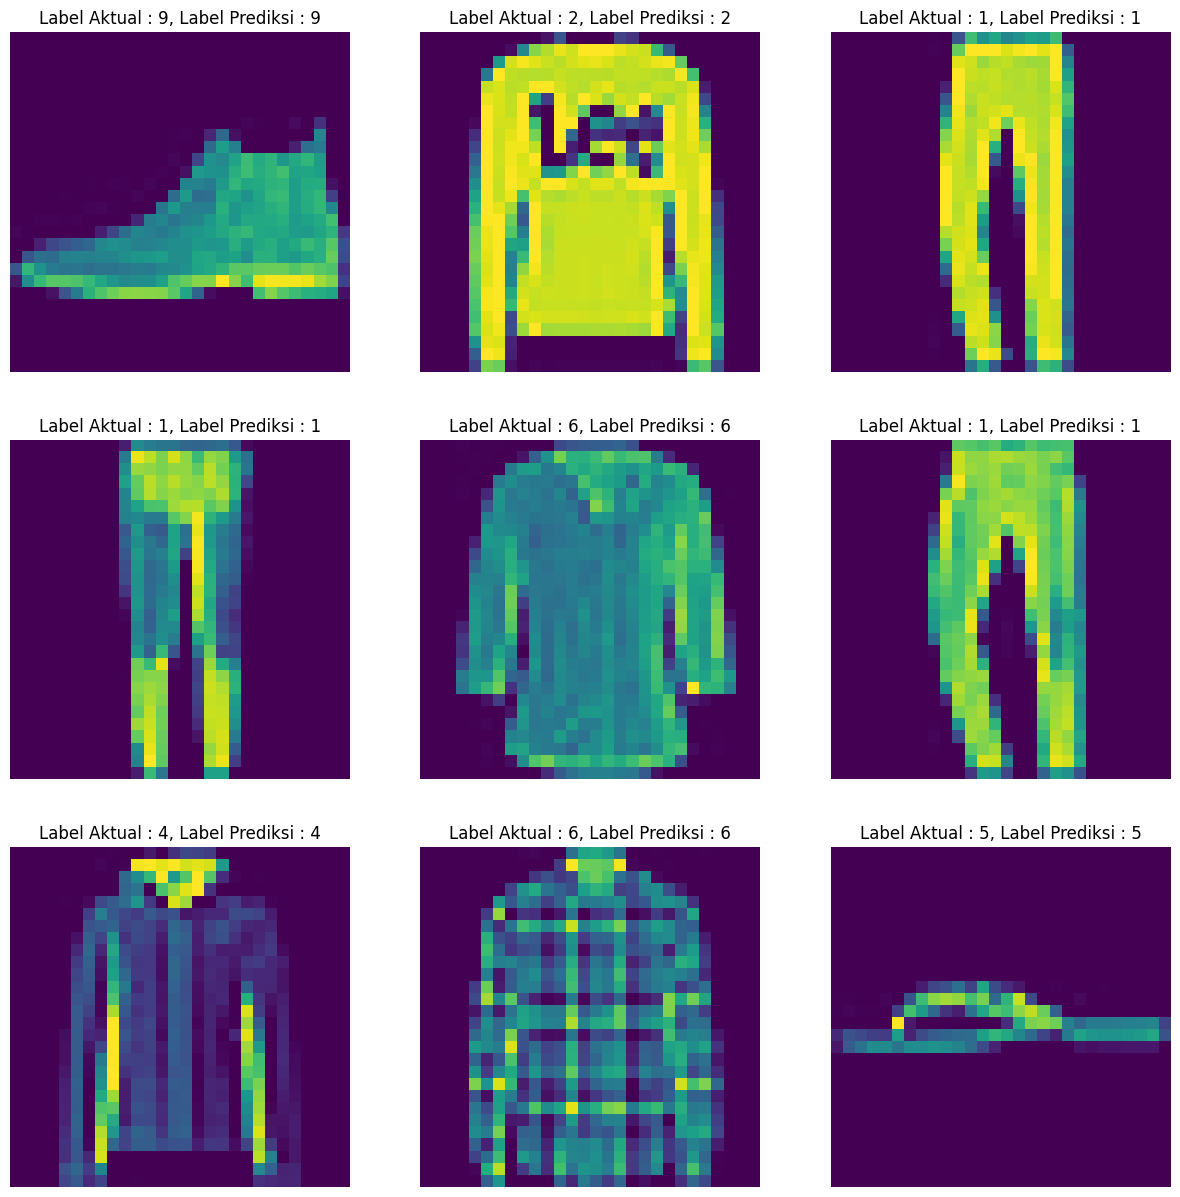

In [41]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)


  ActualLabel = np.argmax(y_test[i])
  plt.title(f"Label Aktual : {ActualLabel}, Label Prediksi : {label[i]}")
  plt.imshow(x_test[i].reshape(28, 28))
  plt.axis('off')

plt.show()